# General EDA of Vegetable Synthetic Dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import plotly.express as px
import plotly.graph_objs as go

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.power import FTestPower


# Data Dictionary

| Column           | Data Type | Description                                                       |
|------------------|-----------|-------------------------------------------------------------------|
| `S. no.`         | `int64`   | Serial number, a unique identifier for each row                   |
| `Name`           | `object`  | Name of the vegetable                                             |
| `Soil_Type`      | `object`  | Type of soil in which the vegetable is grown                      |
| `Fertility`      | `object`  | Fertility status of the soil                                      |
| `Photoperiod`    | `object`  | Duration of light exposure the vegetable receives                 |
| `N-P-K Ratio`    | `object`  | Ratio of Nitrogen (N), Phosphorus (P), and Potassium (K) in the soil |
| `Temperature`    | `float64` | Average temperature (in degrees Celsius)                          |
| `Rainfall`       | `float64` | Amount of rainfall (in millimeters)                               |
| `pH`             | `float64` | pH level of the soil                                              |
| `Light_Hours`    | `float64` | Number of light hours per day                                     |
| `Light_Intensity`| `float64` | Intensity of light received (in lumens)                           |
| `Rh`             | `float64` | Relative humidity (percentage)                                    |
| `Yield`          | `float64` | Yield of the vegetable (100 g per hectare)                      |
| `Season`         | `object`  | Growing season of the vegetable (e.g., Winter, Spring, Summer, Fall) |


## General EDA

In [3]:
veg_data = pd.read_csv('/Users/kamiasalango/Desktop/Milan_Data_Urban_Ag/synthetic_veg_normal_crop_data.csv')

In [4]:
veg_data.head(2)

,S. no.,Name,Soil_Type,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Yield,Season
0,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,22.489987,495.524098,6.272267,7.398897,529.733246,53.334987,60.647800,Fall
1,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.008877,454.428932,6.377733,6.625545,667.273615,57.410295,60.624575,Spring


In [5]:
veg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. no.           1000 non-null   int64  
 1   Name             1000 non-null   object 
 2   Soil_Type        1000 non-null   object 
 3   Fertility        1000 non-null   object 
 4   Photoperiod      1000 non-null   object 
 5   N-P-K Ratio      1000 non-null   object 
 6   Temperature      1000 non-null   float64
 7   Rainfall         1000 non-null   float64
 8   pH               1000 non-null   float64
 9   Light_Hours      1000 non-null   float64
 10  Light_Intensity  1000 non-null   float64
 11  Rh               1000 non-null   float64
 12  Yield            1000 non-null   float64
 13  Season           1000 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 109.5+ KB


In [6]:
#check for nulls 
veg_data.isnull().sum()

S. no.             0
Name               0
Soil_Type          0
Fertility          0
Photoperiod        0
N-P-K Ratio        0
Temperature        0
Rainfall           0
pH                 0
Light_Hours        0
Light_Intensity    0
Rh                 0
Yield              0
Season             0
dtype: int64

### Categorical Variables

The following variables can be considered categorical 
 - `S. no.` (int64): Serial number, a unique identifier for each row
- `Name` (object): Name of the vegetable
- `Soil_Type` (object): Type of soil in which the vegetable is grown
- `Fertility` (object): Fertility status of the soil
- `Photoperiod` (object): Duration of light exposure the vegetable receives
- `Season` (object): Growing season of the vegetable (e.g., Winter, Spring, Summer, Fall)

In [7]:
#number of samples per vegetable
veg_counts = veg_data['Name'].value_counts()
print(veg_counts)

Name
Tomatoes          100
Eggplants         100
Asparagus         100
Chilli Peppers    100
Cabbage           100
Cucumbers         100
Potatoes          100
Cauliflowers      100
Broccoli          100
Green Peas        100
Name: count, dtype: int64


In [8]:
#Soil type vals
soil_type_counts= veg_data['Soil_Type'].value_counts()
print('Unique Values for Soil Type and counts:', soil_type_counts)


Unique Values for Soil Type and counts: Soil_Type
Fertile, well-drained loam or sandy loam soil                          100
Well-drained, sandy loam or loam soil with high organic content        100
 Deep sandy loam                                                       100
medium, organic                                                        100
Well-drained, fertile loam with high organic content                   100
Well-drained, sandy loam soil                                          100
Loamy, well-drained soil                                               100
Fertile, well-drained, moist soil with high organic matter content.    100
Rich, well-drained, loamy soil                                         100
Light, sandy, fertile, and well-drained soil                           100
Name: count, dtype: int64


In [9]:
veg_data['Soil_Labels'] = veg_data['Soil_Type'].str.split(',')

In [10]:
#function to get features from soil descriptions
def extract_soil_features(soil_type):
    features = {
        'Fertile': int('fertile' in soil_type.lower()),
        'Well_Drained': int('well-drained' in soil_type.lower()),
        'Loam': int('loam' in soil_type.lower()),
        'Sandy': int('sandy' in soil_type.lower()),
        'Organic': int('organic' in soil_type.lower()),
        'Moist': int('moist' in soil_type.lower())
    }
    return features

In [11]:
#apply function to soil type
soil_features = veg_data['Soil_Type'].apply(extract_soil_features)

In [12]:
#create df with soil features to concat to original df(veg_data)
soilfeatures_df = pd.DataFrame(soil_features.tolist())
#concat 
veg_data = pd.concat([veg_data, soilfeatures_df], axis=1)

In [13]:
veg_data.head(3)

,S. no.,Name,Soil_Type,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,...,Rh,Yield,Season,Soil_Labels,Fertile,Well_Drained,Loam,Sandy,Organic,Moist
0,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,22.489987,495.524098,6.272267,7.398897,...,53.334987,60.647800,Fall,"[Fertile, well-drained loam or sandy loam soil]",1,1,1,1,0,0
1,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.008877,454.428932,6.377733,6.625545,...,57.410295,60.624575,Spring,"[Fertile, well-drained loam or sandy loam soil]",1,1,1,1,0,0
2,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.441689,493.920716,6.094119,7.370845,...,51.558559,61.403798,Spring,"[Fertile, well-drained loam or sandy loam soil]",1,1,1,1,0,0


In [14]:
veg_data['Season'].unique()

array([' Fall', 'Spring', ' Summer',
       ' Fall                                                                         ',
       ' Summer                                           ', 'Fall',
       'Winter', ' Winter', ' Fall      '], dtype=object)

In [15]:
#Clean up whitespace in 'Season' values
veg_data['Season'] = veg_data['Season'].str.strip().str.replace('\s+', ' ')

In [16]:
season_proportions = veg_data['Season'].value_counts(normalize=True)
print(season_proportions)

Season
Fall      0.360
Spring    0.352
Summer    0.214
Winter    0.074
Name: proportion, dtype: float64


Most vegetables growing seasons fall wtihin fall and spring, but appears to be a good variety of vegetables for growing seasons, although more could be added for winter. Very similar to uniform distribution. 

In [17]:
fertility_counts= veg_data['Fertility'].value_counts()
print('Unique Values for Ferility and counts:', fertility_counts)

Unique Values for Ferility and counts: Fertility
High        700
moderate    300
Name: count, dtype: int64


In [18]:
high_fertility_vegetables = veg_data.loc[veg_data['Fertility'] == 'High', 'Name'].unique()
moderate_fertility_vegetables = veg_data.loc[veg_data['Fertility'] == 'moderate', 'Name'].unique()

print("Vegetables with High Fertility:")
print(high_fertility_vegetables)

print("\nVegetables with Moderate Fertility:")
print(moderate_fertility_vegetables)

Vegetables with High Fertility:
['Tomatoes' 'Eggplants' 'Asparagus' 'Cabbage' 'Cucumbers' 'Cauliflowers'
 'Broccoli']

Vegetables with Moderate Fertility:
['Chilli Peppers' 'Potatoes' 'Green Peas']


In [19]:
photoperiod_counts= veg_data['Photoperiod'].value_counts()
print('Unique Values for Photoperiod and counts:', photoperiod_counts)

Unique Values for Photoperiod and counts: Photoperiod
Short Day Period    1000
Name: count, dtype: int64


All vegetables appear to be shortday period, they require a certain amount of hours of darkness in order to flower, this may be taken into consideration for agriculture planning. Light hours are given in the data set. 

**Relationships, and Insights into Yield with Categorical Variables**

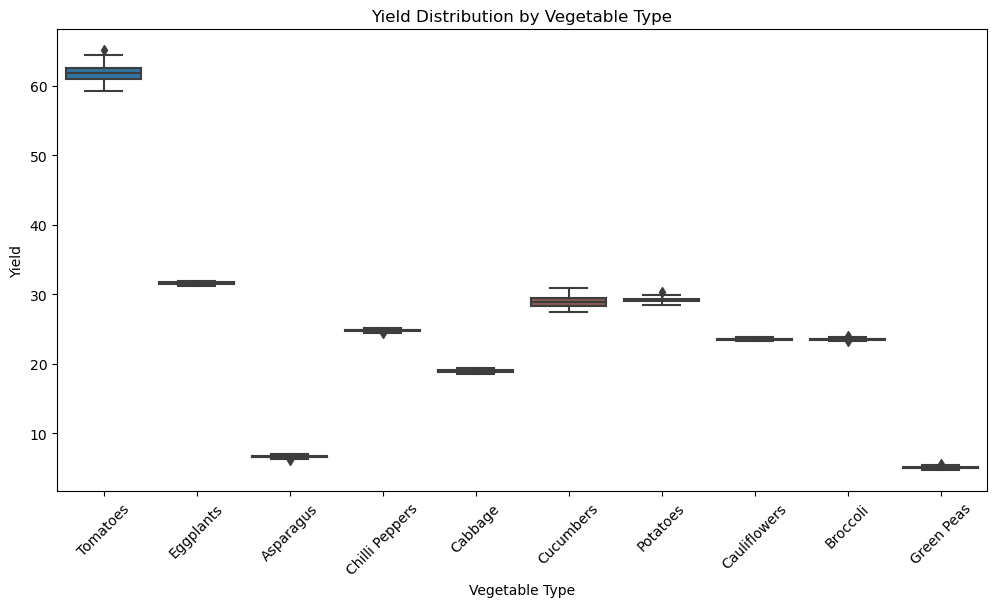

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Name', y='Yield', data=veg_data)
plt.xticks(rotation=45)
plt.xlabel('Vegetable Type')
plt.ylabel('Yield')
plt.title('Yield Distribution by Vegetable Type')
plt.show()

Yeild shows a little difference in normal distribution, less overall variability of distirubtion within the middle %50, yields still fall within the same range. 

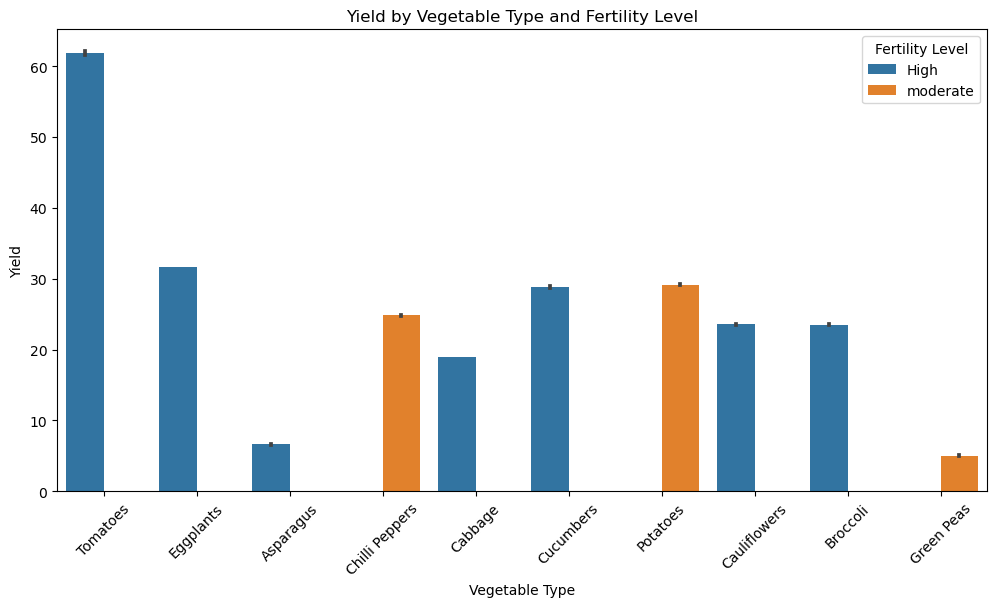

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Yield', hue='Fertility', data=veg_data)
plt.xticks(rotation=45)
plt.xlabel('Vegetable Type')
plt.ylabel('Yield')
plt.title('Yield by Vegetable Type and Fertility Level')
plt.legend(title='Fertility Level')
plt.show()

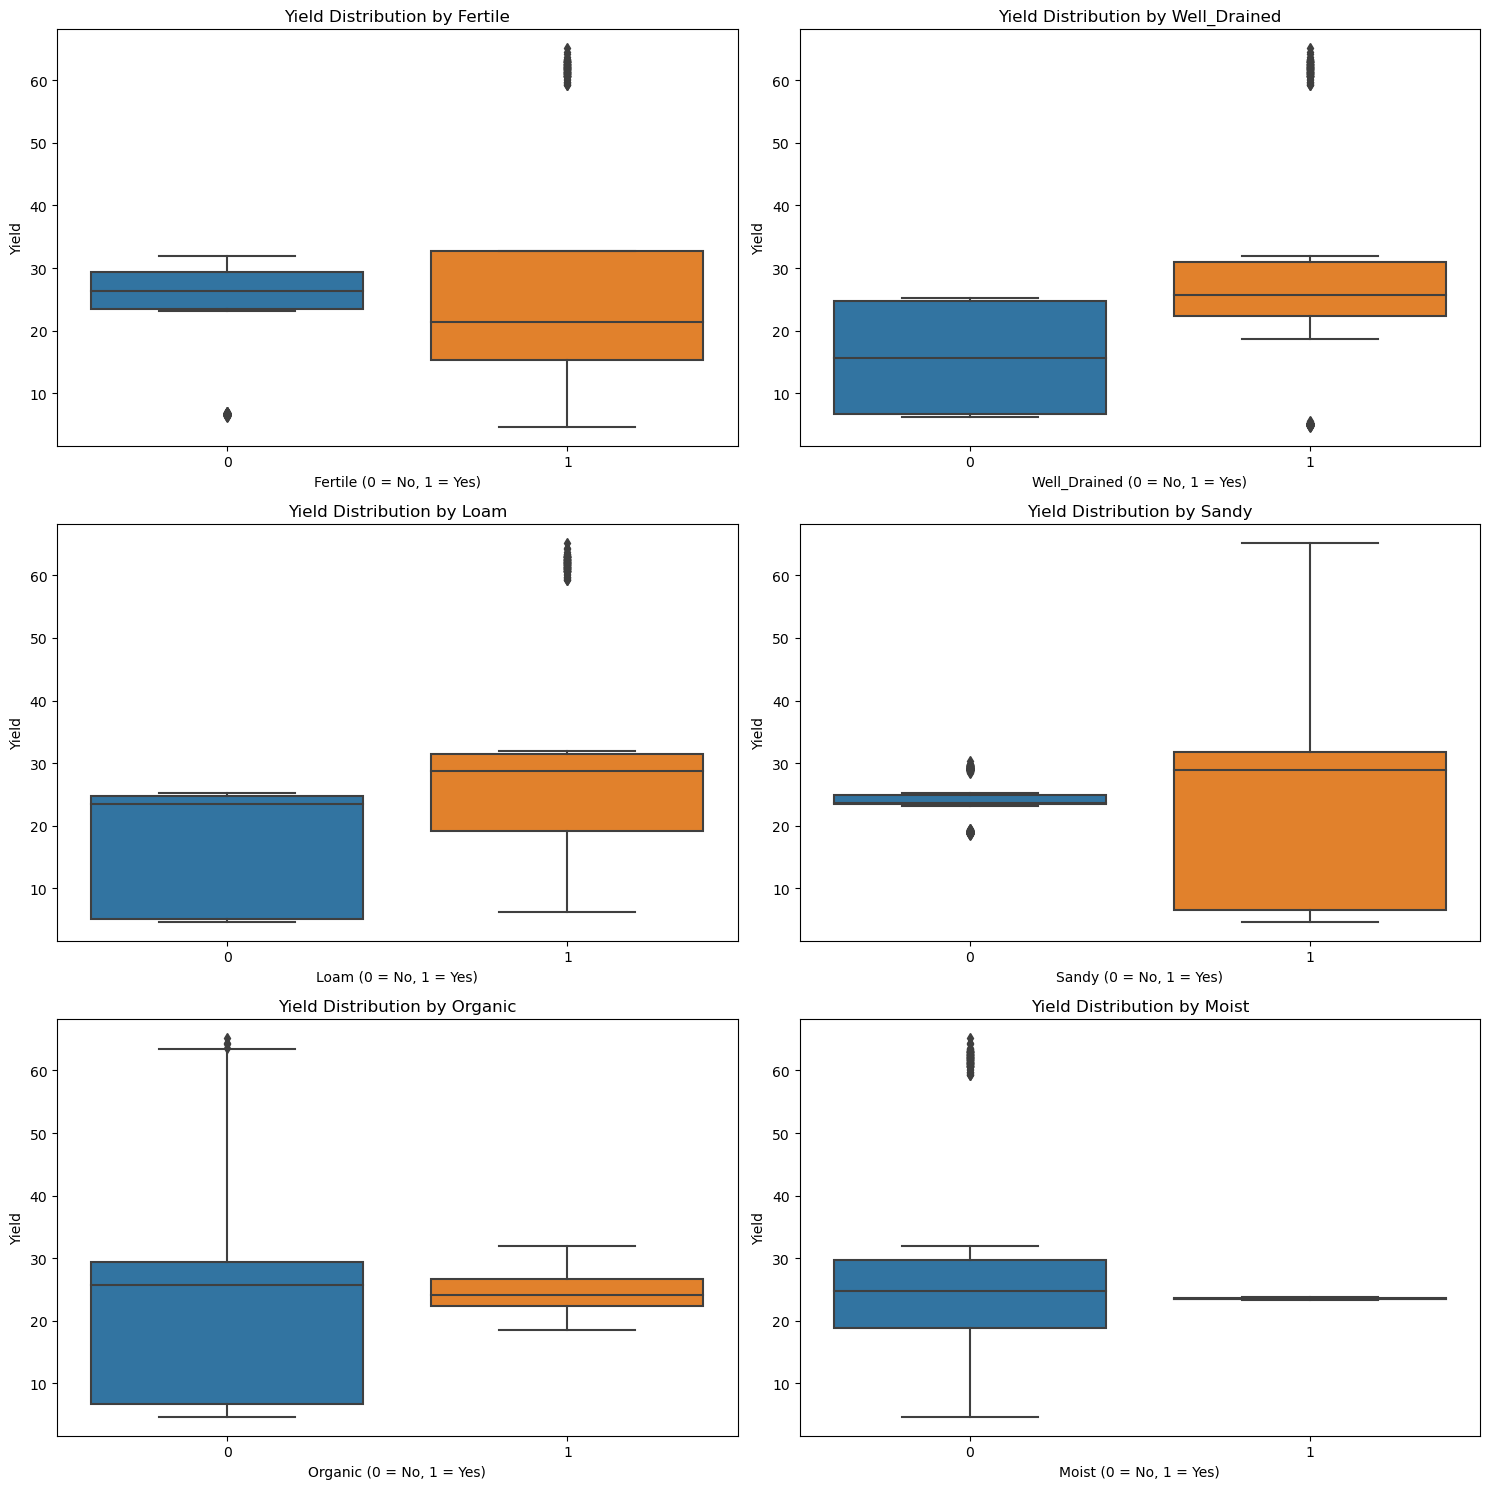

In [22]:
soil_characteristics = ['Fertile', 'Well_Drained', 'Loam', 'Sandy', 'Organic', 'Moist']

#3x3 grid of box plots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

#flatten the axes array for easy iteration
axes = axes.flatten()

#loop through each soil characteristic and create a box plot
for i, characteristic in enumerate(soil_characteristics):
    sns.boxplot(x=characteristic, y='Yield', data=veg_data, ax=axes[i])
    axes[i].set_title(f'Yield Distribution by {characteristic}')
    axes[i].set_xlabel(f'{characteristic} (0 = No, 1 = Yes)')
    axes[i].set_ylabel('Yield')


plt.tight_layout()
plt.show()

Soil box plots seem exactly same as uniform distribution, probably due to how the soil data was generated and then encoded. Might need to augment?? Or need further data on how soil conditions affect yeild of different crops. As one condition (the ideal condition) is listed for each vegetable. Same with NPK. 

Well drained, sandy, and loamy appear to have a higher median of yeild. There are lots of other factors that may influence yield that are not taken into consideration. 

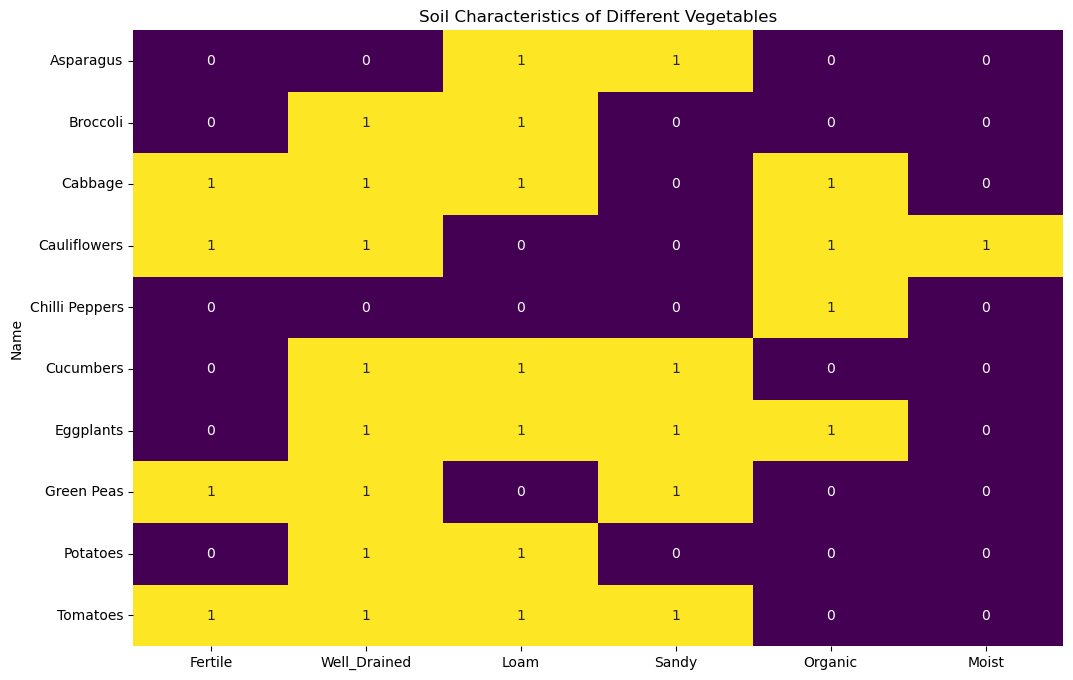

In [23]:
#subset of the DataFrame with vegetable names and soil characteristics
soil_characteristics = ['Fertile', 'Well_Drained', 'Loam', 'Sandy', 'Organic', 'Moist']
veg_soil_matrix = veg_data[['Name'] + soil_characteristics]

#Group by vegetable name and aggregate to ensure each vegetable appears only once
veg_soil_matrix = veg_soil_matrix.groupby('Name').max().reset_index()

#Set vegetable names as the index for better visualization
veg_soil_matrix.set_index('Name', inplace=True)

#plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(veg_soil_matrix, annot=True, cmap='viridis', cbar=False)
plt.title('Soil Characteristics of Different Vegetables')
plt.show()

### Continuous, Numeric Variables

- `Temperature` (float64): Average temperature (in degrees Celsius)
- `Rainfall` (float64): Amount of rainfall (in millimeters)
- `pH` (float64): pH level of the soil
- `Light_Hours` (float64): Number of light hours per day
- `Light_Intensity` (float64): Intensity of light received (in lumens)
- `Rh` (float64): Relative humidity (percentage)
- `Yield` (float64): Yield of the vegetable (in tons per hectare)
- `N-P-K Ratio` (object): Ratio of Nitrogen (N), Phosphorus (P), and Potassium (K) in the soil

In [24]:
#basic descriptive stats:
veg_data.describe()

,S. no.,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Yield,Fertile,Well_Drained,Loam,Sandy,Organic,Moist
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.00000,1000.000000,1000.00000
mean,5.500000,21.223453,899.822311,6.314535,7.788497,454.160624,62.491512,25.407443,0.400000,0.8000,0.700000,0.50000,0.400000,0.10000
std,2.873719,3.388224,248.827272,0.387982,1.081211,107.980401,9.444966,14.874399,0.490143,0.4002,0.458487,0.50025,0.490143,0.30015
min,1.000000,9.382705,408.922109,4.869373,5.916419,208.199107,41.949928,4.648454,0.000000,0.0000,0.000000,0.00000,0.000000,0.00000
25%,3.000000,19.107643,717.766522,6.093833,6.929032,377.061951,54.588245,18.978198,0.000000,1.0000,0.000000,0.00000,0.000000,0.00000
50%,5.500000,21.100561,895.413750,6.339494,7.277581,434.972823,60.628367,24.174195,0.000000,1.0000,1.000000,0.50000,0.000000,0.00000
75%,8.000000,23.949001,1047.528260,6.556465,8.862176,534.277933,70.848804,29.416648,1.000000,1.0000,1.000000,1.00000,1.000000,0.00000
max,10.000000,31.246506,1634.156080,7.397805,11.594160,802.796178,94.308429,65.126196,1.000000,1.0000,1.000000,1.00000,1.000000,1.00000


### Descriptive Statistics Comparison: Uniform vs. Normal Distribution

#### Uniform Distribution Descriptive Statistics

| Statistic   | Temperature | Rainfall | pH       | Light_Hours | Light_Intensity | Rh        | Yield    |
|-------------|--------------|----------|----------|-------------|-----------------|-----------|----------|
| Count       | 1000         | 1000     | 1000     | 1000        | 1000            | 1000      | 1000     |
| Mean        | 5.50         | 21.47    | 901.18   | 6.33        | 7.80            | 446.97    | 62.57    |
| Std         | 2.87         | 4.13     | 267.61   | 0.48        | 1.25            | 140.96    | 10.41    |
| Min         | 1.00         | 10.03    | 400.36   | 5.01        | 6.00            | 201.30    | 40.34    |
| 25%         | 3.00         | 18.78    | 692.61   | 6.05        | 6.79            | 340.21    | 54.39    |
| 50%         | 5.50         | 21.31    | 912.54   | 6.35        | 7.59            | 422.71    | 60.04    |
| 75%         | 8.00         | 24.18    | 1079.10  | 6.65        | 8.67            | 532.61    | 69.61    |
| Max         | 10.00        | 31.82    | 1597.21  | 7.49        | 11.96           | 799.29    | 89.95    |

#### Normal Distribution Descriptive Statistics

| Statistic   | Temperature | Rainfall | pH       | Light_Hours | Light_Intensity | Rh        | Yield    |
|-------------|--------------|----------|----------|-------------|-----------------|-----------|----------|
| Count       | 1000         | 1000     | 1000     | 1000        | 1000            | 1000      | 1000     |
| Mean        | 5.50         | 21.22    | 899.82   | 6.31        | 7.79            | 454.16    | 62.49    |
| Std         | 2.87         | 3.39     | 248.83   | 0.39        | 1.08            | 107.98    | 9.44     |
| Min         | 1.00         | 9.38     | 408.92   | 4.87        | 5.92            | 208.20    | 41.95    |
| 25%         | 3.00         | 19.11    | 717.77   | 6.09        | 6.93            | 377.06    | 54.59    |
| 50%         | 5.50         | 21.10    | 895.41   | 6.34        | 7.28            | 434.97    | 60.63    |
| 75%         | 8.00         | 23.95    | 1047.53  | 6.56        | 8.86            | 534.28    | 70.85    |
| Max         | 10.00        | 31.25    | 1634.16  | 7.40        | 11.59           | 802.80    | 94.31    |

### Key Differences and Interpretations

1. **Mean and Median**:
   - **Uniform Distribution**: The mean and median are close, but they may not be as close as in a normal distribution.
   - **Normal Distribution**: The mean and median are very close, indicating symmetry around the central value.

2. **Standard Deviation**:
   - **Uniform Distribution**: Higher standard deviation for some variables (e.g., Rainfall, Light Intensity, Yield), indicating more spread.
   - **Normal Distribution**: Generally lower standard deviation, indicating more clustering around the mean.

3. **Quartiles**:
   - **Uniform Distribution**: Quartiles are more spread out, indicating more variability in the middle 50% of the data.
   - **Normal Distribution**: Quartiles are closer together, showing less variability in the middle 50% of the data.

4. **Minimum and Maximum**:
   - **Uniform Distribution**: The range from minimum to maximum is consistent with a uniform spread across the variable range.
   - **Normal Distribution**: The range can be similar but the data points are more concentrated around the mean.

### Specific Observations

1. **Temperature**:
   - Similar means and medians, but the normal distribution has a tighter interquartile range.

2. **Rainfall**:
   - Higher variability in the uniform distribution (std = 4.13) compared to the normal distribution (std = 3.39).

3. **pH**:
   - Slightly lower standard deviation in the normal distribution (std = 248.83) compared to the uniform distribution (std = 267.61).

4. **Light Hours**:
   - The normal distribution has less variability (std = 0.39) compared to the uniform distribution (std = 0.48).

5. **Light Intensity**:
   - The normal distribution has a slightly lower standard deviation (std = 1.08) compared to the uniform distribution (std = 1.25).

6. **Relative Humidity (Rh)**:
   - The normal distribution shows less variability (std = 107.98) compared to the uniform distribution (std = 140.96).

7. **Yield**:
   - Less variability in the normal distribution (std = 9.44) compared to the uniform distribution (std = 10.41).

### Implications for Modeling

- **Normal Distribution**:
  - Data points are more clustered around the mean, leading to potentially better model performance due to reduced variability.
  - The middle 50% of data points are closer to the mean, which can help in capturing consistent patterns.

- **Uniform Distribution**:
  - Higher variability can lead to challenges in modeling, as the data is more spread out.
  - Models may need to handle a wider range of values, which can affect performance metrics.

### Conclusion

- The normally distributed dataset shows more clustering around the mean and reduced variability in the middle 50% of the data, making it potentially easier for models to learn consistent patterns. In contrast, the uniform distribution dataset has higher variability, which can pose challenges for modeling and require more robust techniques to capture the underlying relationships effectively.
 
 - Environmental variables that affect yield will likely reflect a normal distirubtion. 
 - May need a larger data set, to further represent normality characteristics? 


**N-P-K** 

In [25]:
# Split the 'N-P-K Ratio' into three separate columns
npk_split = veg_data['N-P-K Ratio'].str.split(':', expand=True)
veg_data['N'] = pd.to_numeric(npk_split[0])
veg_data['P'] = pd.to_numeric(npk_split[1])
veg_data['K'] = pd.to_numeric(npk_split[2])

#Group by 'Name' and check unique NPK ratios for each vegetable
npk_variation = veg_data.groupby('Name').apply(lambda x: x[['N', 'P', 'K']].drop_duplicates()).reset_index(drop=True)

# Display the variations
print(npk_variation)

    N   P   K
0  10  10  10
1  10  10  10
2  10  10  10
3  10  10  10
4  10  10  10
5  10  10  10
6   5  10  10
7   5  10  10
8  10  10  10
9  10  10  10


In [26]:
#Does each vegetable have a set NPK ratio across dataset
unique_npk_ratios = veg_data.groupby('Name')[['N', 'P', 'K']].apply(lambda x: x.drop_duplicates()).reset_index()
unique_npk_ratios.drop('level_1', axis=1, inplace=True)
print("Unique NPK ratios for each vegetable:")
print(unique_npk_ratios)

Unique NPK ratios for each vegetable:
             Name   N   P   K
0       Asparagus  10  10  10
1        Broccoli  10  10  10
2         Cabbage  10  10  10
3    Cauliflowers  10  10  10
4  Chilli Peppers  10  10  10
5       Cucumbers  10  10  10
6       Eggplants   5  10  10
7      Green Peas   5  10  10
8        Potatoes  10  10  10
9        Tomatoes  10  10  10


- Is NPK reffering to fertilizer ratios for each vegetable? 

- There is one NPK ratio for each vegetable and this is the same for each sample. For most vegetables N percentage is 10 (if the NPK ratio is indeed a percentage here?), excluding eggplants and Green peas which have a nitrogen of 5%. All other vegetables have a P and K percentage of 10. 
 

In [27]:
#assign numeric variables to list 
continuous_vars = ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'Yield']

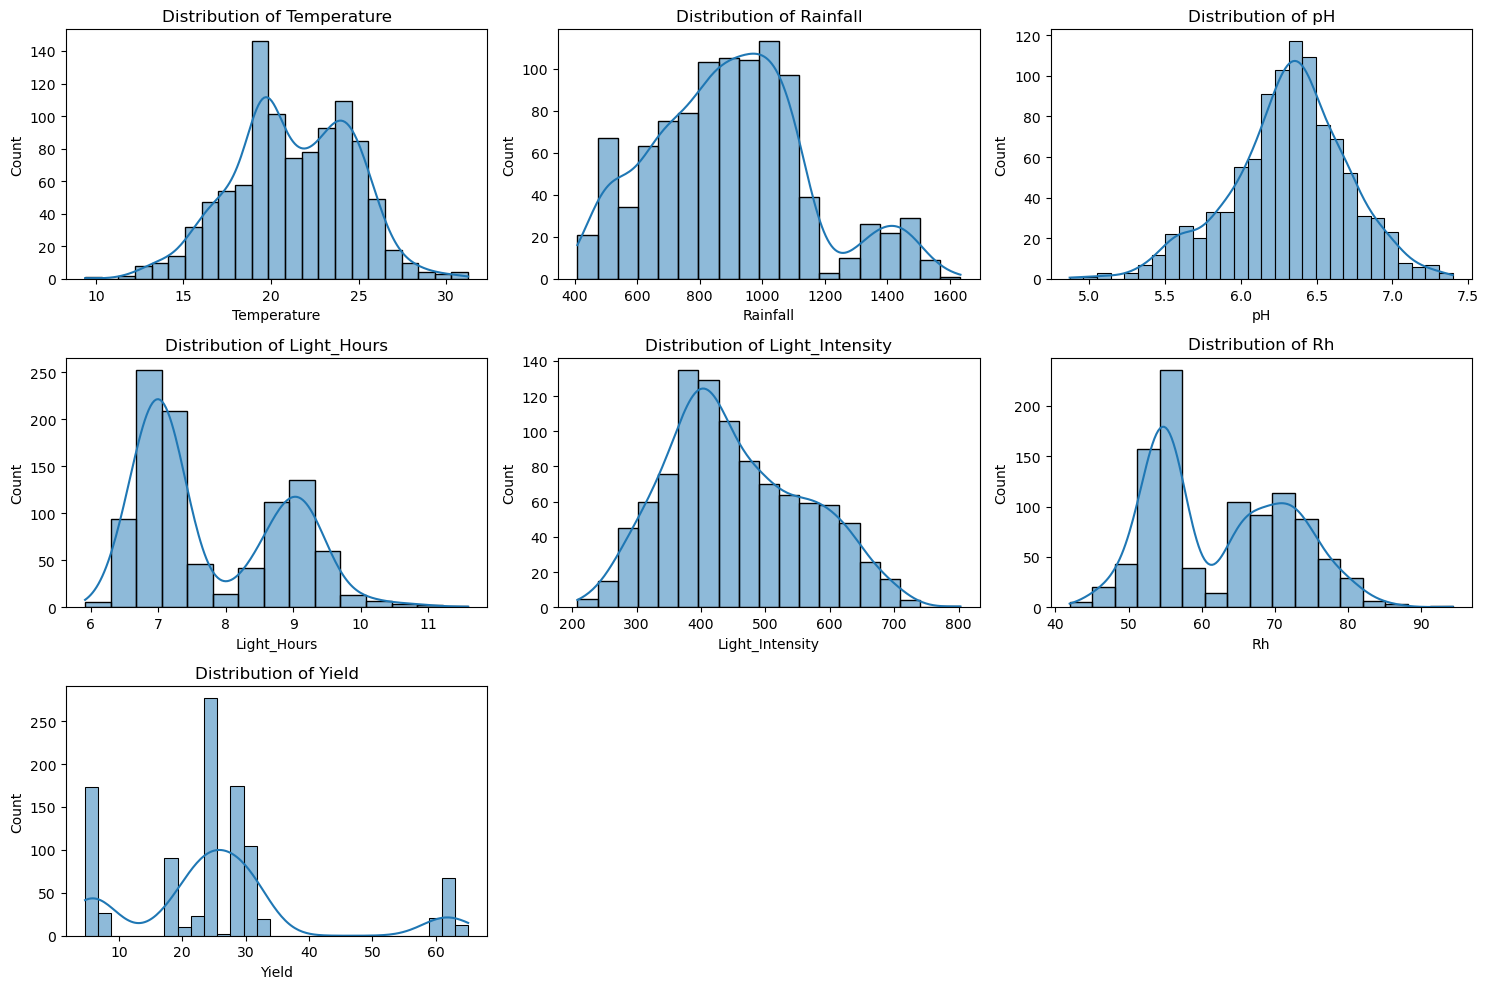

In [28]:
#histograms for each continuous variable
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(veg_data[var], kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

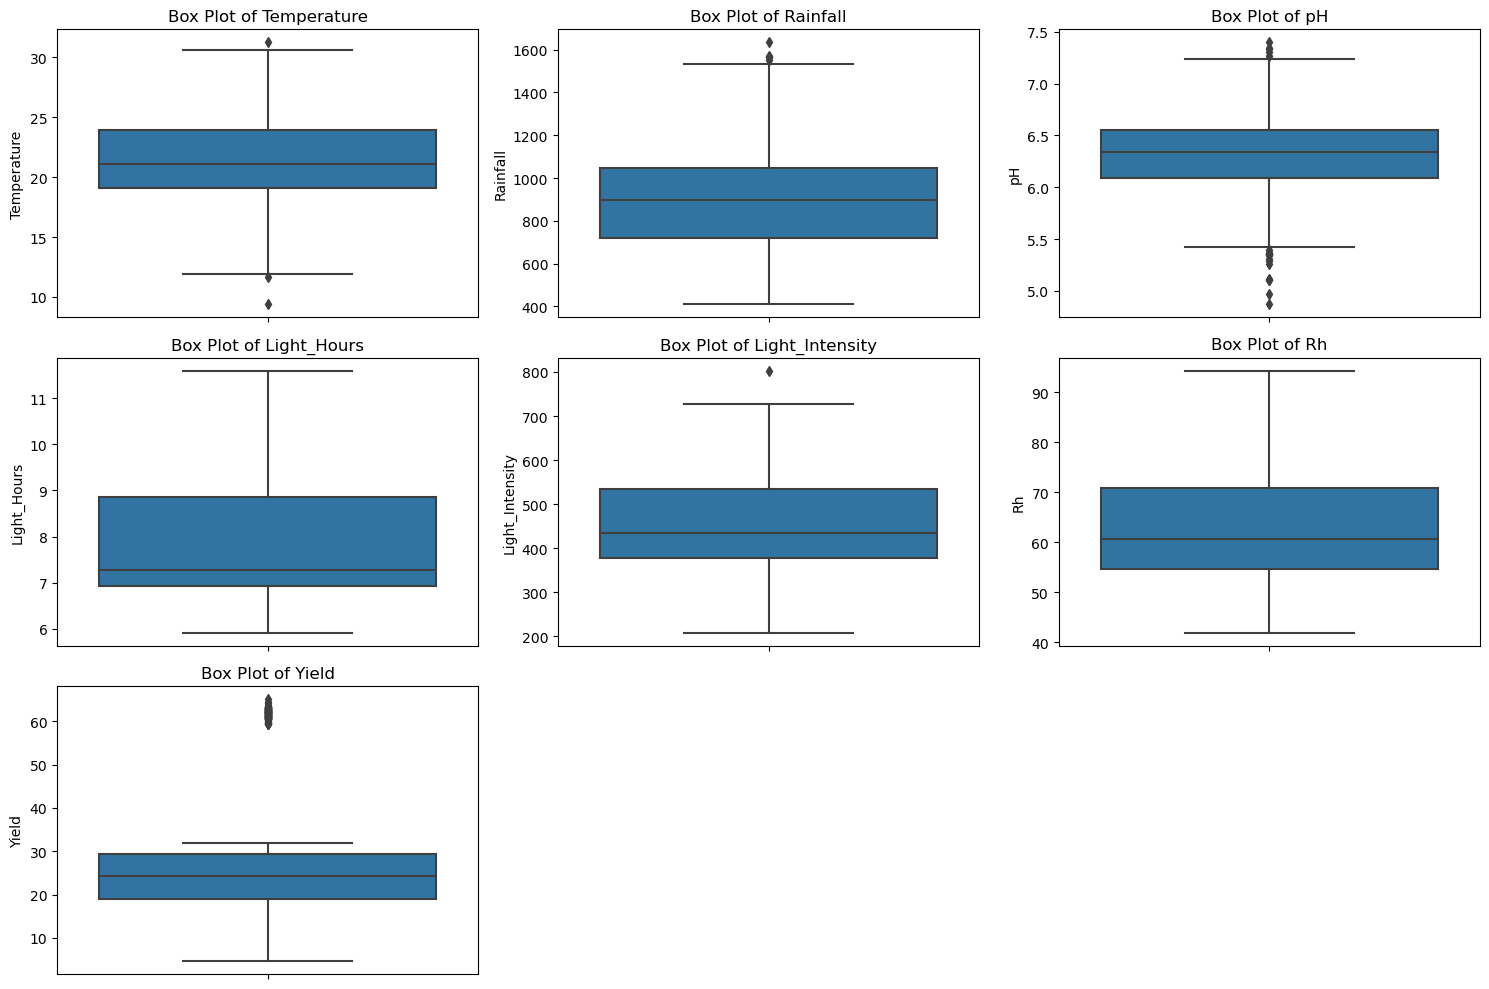

In [29]:
# Box plots for each continuous variable
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=veg_data[var])
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

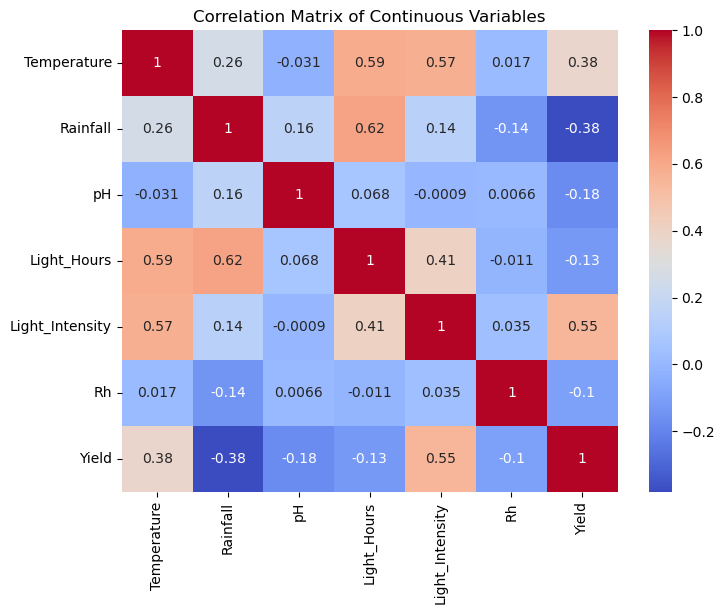

In [30]:
# Calculate the correlation matrix
corr_matrix = veg_data[continuous_vars].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

In [31]:
#Include binarized soil features  in correlation matrix: 
add_features = ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'Yield', 'Fertile',
                 'Well_Drained', 'Loam', 'Sandy', 'Organic', 'Moist']

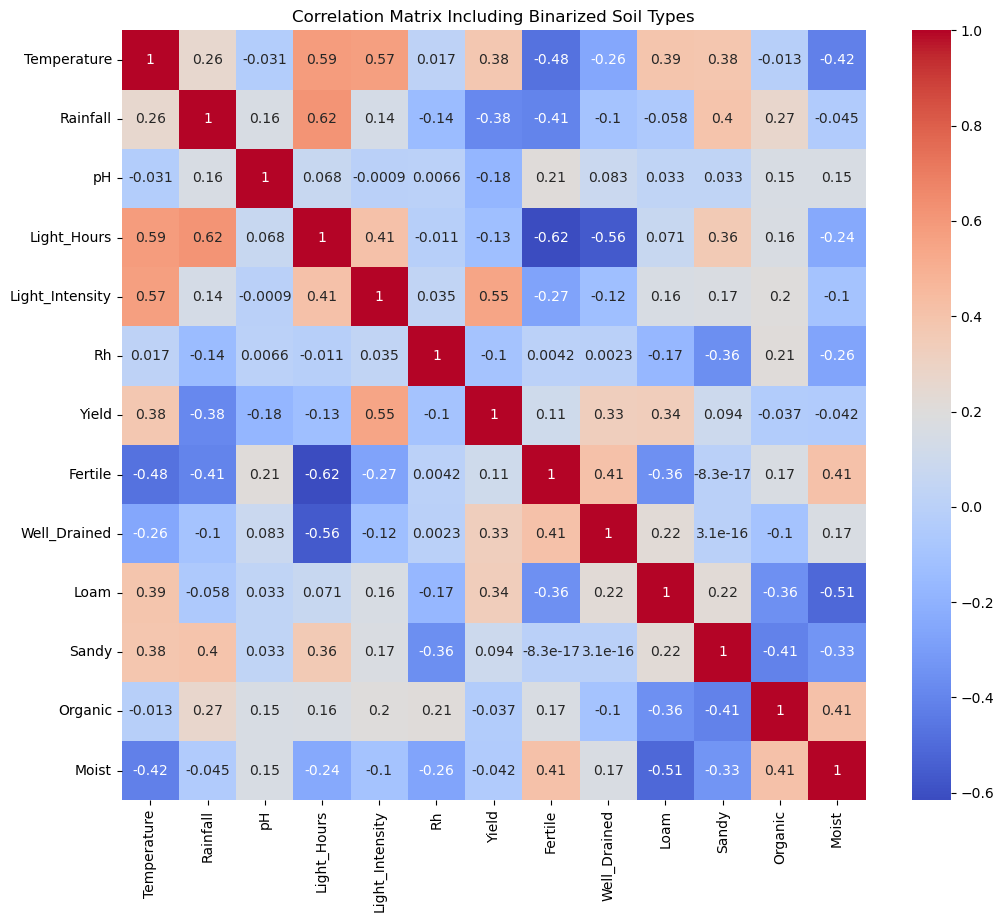

In [32]:
correlation_matrix = veg_data[add_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Including Binarized Soil Types')
plt.show()

In [33]:
#Look at variance in features
feature_variance = veg_data[add_features].var()
print("Feature Variance:")
print(feature_variance)

Feature Variance:
Temperature           11.480059
Rainfall           61915.011172
pH                     0.150530
Light_Hours            1.169017
Light_Intensity    11659.767108
Rh                    89.207388
Yield                221.247738
Fertile                0.240240
Well_Drained           0.160160
Loam                   0.210210
Sandy                  0.250250
Organic                0.240240
Moist                  0.090090
dtype: float64


Less Variance in the normal distribution. 

In [34]:
#VIF Variance Inflation Factor to Assess multicolinearity
X = veg_data[add_features]

#constant column for the intercept term
X_with_const = sm.add_constant(X)

#calculate VIF for each feature (excluding the constant term)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns  # Use original feature names
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i + 1) for i in range(X.shape[1])]  # Skip the constant

print(vif_data)

            feature        VIF
0       Temperature   3.135981
1          Rainfall  11.468124
2                pH   1.557794
3       Light_Hours   5.737727
4   Light_Intensity   2.650820
5                Rh   2.540744
6             Yield   5.291739
7           Fertile  11.185117
8      Well_Drained   5.051136
9              Loam   3.473346
10            Sandy   9.810276
11          Organic   7.114042
12            Moist   3.208751


- VIF = 1: No multicollinearity.
- 1 < VIF < 5: Moderate multicollinearity.
- VIF > 5: High multicollinearity, which may be problematic.
- VIF > 10: Indicates serious multicollinearity problems



### Key Observations between Normal and Uniform Distribution: 

1. **Temperature**:
   - **Uniform**: VIF = 1.599 (Low multicollinearity)
   - **Normal**: VIF = 3.136 (Moderate multicollinearity)

2. **Rainfall**:
   - **Uniform**: VIF = 2.442 (Low multicollinearity)
   - **Normal**: VIF = 11.468 (High multicollinearity)

3. **pH**:
   - **Uniform**: VIF = 1.640 (Low multicollinearity)
   - **Normal**: VIF = 1.558 (Low multicollinearity)

4. **Light_Hours**:
   - **Uniform**: VIF = 2.241 (Low multicollinearity)
   - **Normal**: VIF = 5.738 (Moderate multicollinearity)

5. **Light_Intensity**:
   - **Uniform**: VIF = 1.421 (Low multicollinearity)
   - **Normal**: VIF = 2.651 (Low multicollinearity)

6. **Rh**:
   - **Uniform**: VIF = 2.078 (Low multicollinearity)
   - **Normal**: VIF = 2.541 (Low multicollinearity)

7. **Yield**:
   - **Uniform**: VIF = 2.375 (Low multicollinearity)
   - **Normal**: VIF = 5.292 (Moderate multicollinearity)

8. **Fertile**:
   - **Uniform**: VIF = 5.737 (High multicollinearity)
   - **Normal**: VIF = 11.185 (High multicollinearity)

9. **Well_Drained**:
   - **Uniform**: VIF = 2.321 (Low multicollinearity)
   - **Normal**: VIF = 5.051 (Moderate multicollinearity)

10. **Loam**:
    - **Uniform**: VIF = 6.098 (High multicollinearity)
    - **Normal**: VIF = 3.473 (Moderate multicollinearity)

11. **Sandy**:
    - **Uniform**: VIF = 2.779 (Low multicollinearity)
    - **Normal**: VIF = 9.810 (High multicollinearity)

12. **Organic**:
    - **Uniform**: VIF = 2.486 (Low multicollinearity)
    - **Normal**: VIF = 7.114 (High multicollinearity)

13. **Moist**:
    - **Uniform**: VIF = 4.434 (Moderate multicollinearity)
    - **Normal**: VIF = 3.209 (Moderate multicollinearity)

### Interpretation

1. **Higher Multicollinearity in Normal Distribution**:
   - The normal distribution dataset generally shows higher VIF values, indicating more multicollinearity among the features compared to the uniform distribution dataset.
   - Features like Rainfall, Fertile, and Sandy have particularly high VIF values in the normal distribution, suggesting strong correlations with other features.

2.  **Feature Relationships**:
   - The normal distribution likely captures more complex relationships between the features, leading to higher VIF values.
   - These relationships might reflect real-world dependencies and interactions that are not as apparent in the uniformly distributed data.









# Lasso Regression to Assess Factors Influencing Yield

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV

**Encode Categorical Variables that have not been encoded**

In [36]:
# One-hot encode the vegetable names
veg_data = pd.get_dummies(veg_data, columns=['Name'], drop_first=False) #Can drop a column later to create baseline

In [37]:
#binarize fertility column 
veg_data['Fertile'] = veg_data['Fertility'].apply(lambda x: 1 if x == 'High' else 0)


In [38]:
veg_data.head(3)

,S. no.,Soil_Type,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,...,Name_Asparagus,Name_Broccoli,Name_Cabbage,Name_Cauliflowers,Name_Chilli Peppers,Name_Cucumbers,Name_Eggplants,Name_Green Peas,Name_Potatoes,Name_Tomatoes
0,1,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,22.489987,495.524098,6.272267,7.398897,529.733246,...,False,False,False,False,False,False,False,False,False,True
1,1,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.008877,454.428932,6.377733,6.625545,667.273615,...,False,False,False,False,False,False,False,False,False,True
2,1,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.441689,493.920716,6.094119,7.370845,579.474014,...,False,False,False,False,False,False,False,False,False,True


### Lasso Regression of Entire data set , looking at Yeild

In [41]:
veg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S. no.               1000 non-null   int64  
 1   Soil_Type            1000 non-null   object 
 2   Fertility            1000 non-null   object 
 3   Photoperiod          1000 non-null   object 
 4   N-P-K Ratio          1000 non-null   object 
 5   Temperature          1000 non-null   float64
 6   Rainfall             1000 non-null   float64
 7   pH                   1000 non-null   float64
 8   Light_Hours          1000 non-null   float64
 9   Light_Intensity      1000 non-null   float64
 10  Rh                   1000 non-null   float64
 11  Yield                1000 non-null   float64
 12  Season               1000 non-null   object 
 13  Soil_Labels          1000 non-null   object 
 14  Fertile              1000 non-null   int64  
 15  Well_Drained         1000 non-null   in

In [44]:
veg_overall_yield = veg_data[['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 
    'N', 'P', 'K','Fertile', 'Well_Drained', 'Loam', 'Sandy', 'Organic', 'Moist',
    'Name_Asparagus', 'Name_Broccoli', 'Name_Cabbage', 'Name_Cauliflowers', 
    'Name_Chilli Peppers', 'Name_Cucumbers', 'Name_Eggplants', 
    'Name_Green Peas', 'Name_Potatoes']] #Drop Tomoatoes

In [45]:
#Seperate continuos and categorical -> assign to variable, standardize continious variables
continuous_columns = [
    'Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 
    'N', 'P', 'K'
]

categorical_columns = [
    'Fertile', 'Well_Drained', 'Loam', 'Sandy', 'Organic', 'Moist',
    'Name_Asparagus', 'Name_Broccoli', 'Name_Cabbage', 'Name_Cauliflowers', 
    'Name_Chilli Peppers', 'Name_Cucumbers', 'Name_Eggplants', 
    'Name_Green Peas', 'Name_Potatoes'
    # 'Name_Tomatoes' is dropped to avoid multicollinearity
]

In [46]:
#Standardiez continuous variables
scaler = StandardScaler()
veg_data_standardized = veg_data.copy()
veg_data_standardized[continuous_columns] = scaler.fit_transform(veg_data[continuous_columns])

In [47]:
#Create df for Lasso regression; veg_overall_yield
selected_columns = continuous_columns + categorical_columns
veg_overall_yield = veg_data_standardized[selected_columns]

In [48]:
veg_overall_yield.head(2)

,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,N,P,K,Fertile,...,Moist,Name_Asparagus,Name_Broccoli,Name_Cabbage,Name_Cauliflowers,Name_Chilli Peppers,Name_Cucumbers,Name_Eggplants,Name_Green Peas,Name_Potatoes
0,0.373992,-1.625628,-0.108998,-0.360517,0.700224,-0.969946,0.5,0.0,0.0,1,...,0,False,False,False,False,False,False,False,False,False
1,0.822501,-1.790866,0.162971,-1.076140,1.974614,-0.538251,0.5,0.0,0.0,1,...,0,False,False,False,False,False,False,False,False,False


In [49]:
veg_overall_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          1000 non-null   float64
 1   Rainfall             1000 non-null   float64
 2   pH                   1000 non-null   float64
 3   Light_Hours          1000 non-null   float64
 4   Light_Intensity      1000 non-null   float64
 5   Rh                   1000 non-null   float64
 6   N                    1000 non-null   float64
 7   P                    1000 non-null   float64
 8   K                    1000 non-null   float64
 9   Fertile              1000 non-null   int64  
 10  Well_Drained         1000 non-null   int64  
 11  Loam                 1000 non-null   int64  
 12  Sandy                1000 non-null   int64  
 13  Organic              1000 non-null   int64  
 14  Moist                1000 non-null   int64  
 15  Name_Asparagus       1000 non-null   bo

In [50]:
#Define X and y 
X = veg_overall_yield
y = veg_data['Yield']

In [51]:
#Train, Test Split (oy-> overall yield)
X_train_oy, X_test_oy, y_train_oy, y_test_oy = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
#Lasso, instatiate model
Lasso_cv = LassoCV(cv=5, random_state =7)
#Fit model
Lasso_cv.fit(X_train_oy, y_train_oy)
#Get best alpha value: 
best_alpha= Lasso_cv.alpha_
print('alpha:', best_alpha)

alpha: 0.007968277811820246


In [53]:
y_train_pred_oy = Lasso_cv.predict(X_train_oy)
mse_train = mean_squared_error(y_train_oy, y_train_pred_oy)
r2_train = r2_score(y_train_oy, y_train_pred_oy)
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R-squared: {r2_train}")

Training Mean Squared Error: 0.24617204940190504
Training R-squared: 0.9988702021170611


In [54]:
#Evaluate and look at features
y_pred_oy = Lasso_cv.predict(X_test_oy)

#Calculate performance metrics
mse= mean_squared_error(y_test_oy, y_pred_oy)
r2 = r2_score(y_test_oy, y_pred_oy)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#Coeffs
print("Lasso Coefficients:")
for feature, coef in zip(X.columns, Lasso_cv.coef_):
    print(f"{feature}: {coef}")

Mean Squared Error: 0.23654265704490052
R-squared: 0.99898519076678
Lasso Coefficients:
Temperature: 0.10989208583014316
Rainfall: -0.488578141267073
pH: -0.20874116260395556
Light_Hours: -0.0
Light_Intensity: 0.03934966119347244
Rh: -0.02870251262918415
N: 11.30506047881512
P: 0.0
K: 0.0
Fertile: -0.0
Well_Drained: 0.0
Loam: 4.482270076838272
Sandy: 32.30234831675868
Organic: -0.0
Moist: -0.0
Name_Asparagus: -53.711254846528135
Name_Broccoli: -4.633009343637704
Name_Cabbage: -9.199469256122773
Name_Cauliflowers: -0.0
Name_Chilli Peppers: 0.7586209227707159
Name_Cucumbers: -31.142336960686116
Name_Eggplants: 0.0
Name_Green Peas: -22.391501073875787
Name_Potatoes: 0.0


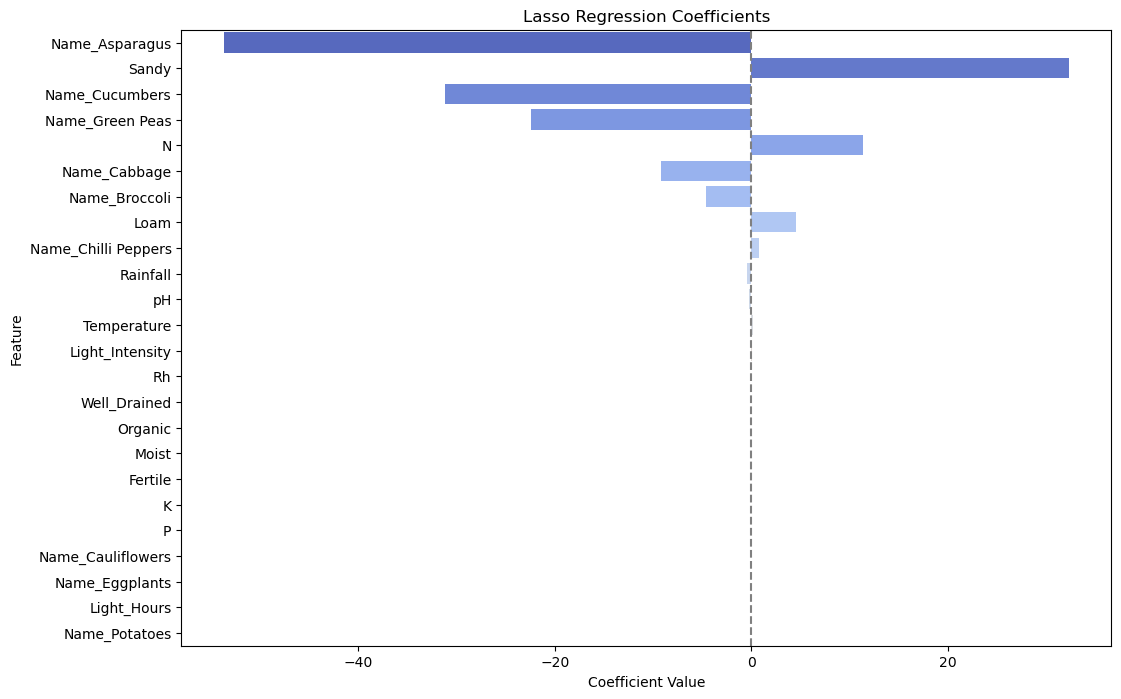

In [55]:
#plot 
feature_names = X.columns
coefficients = Lasso_cv.coef_
#df of coeffs
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
#sort coeffs (Use absolute value to sort)
coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)

#PLOT 
plt.figure(figsize=(12, 8))

sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm', orient='h')

#Add a vertical line at x=0 for the middle axis
plt.axvline(x=0, color='grey', linestyle='--')

#titles and labels
plt.title('Lasso Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()



### Summary and Interpretation Between Normal and Uniform Distribution
**Performance Metrics**

Mean Squared Error (MSE):

- Normal Distribution: 0.2365
- Uniform Distribution: 0.7112
The normal distribution dataset has a significantly lower MSE, indicating better model performance.

R-squared:

- Normal Distribution: 0.9990
- Uniform Distribution: 0.9969
Both datasets show very high R-squared values, indicating that the models explain most of the variance in the yield. However, the normal distribution has a slightly higher R-squared, suggesting a better fit.

**Lasso Coefficients**
- Temperature: Higher coefficient in the normal distribution (0.1099) compared to the uniform distribution (0.0487), indicating a stronger influence on yield.
- Rainfall: More negative impact in the normal distribution (-0.4886) than in the uniform distribution (-0.1267).
- pH: Negative coefficient in the normal distribution (-0.2087) compared to a small positive in the uniform distribution (0.0080), suggesting a differing influence.
- Light_Hours: Negligible in both distributions.
- Light_Intensity: Positive in both distributions, slightly higher in the normal distribution (0.0393 vs. 0.0122).
- Rh: Small negative impact in the normal distribution (-0.0287), negligible in the uniform distribution.
- N: Large positive coefficient in both distributions, slightly higher in the uniform distribution (11.9293 vs. 11.3051).
- Loam and Sandy: Both have significant positive coefficients in both distributions, with similar magnitudes.
- Crop Names (e.g., Name_Asparagus, Name_Broccoli, etc.): Large negative coefficients for some crops (e.g., Asparagus, Broccoli) in both distributions, indicating these crops are associated with lower yields compared to the reference crop(Tomatoes).


### Lasso Regression for each Vegetable to find important features affecting Yeild 

In [56]:
#list of continuos variables
continuous_vars = ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'N', 'P', 'K']

#vegetable names (binarized features) list
vegetables = ['Name_Asparagus', 'Name_Broccoli', 'Name_Cabbage', 'Name_Cauliflowers', 
              'Name_Chilli Peppers', 'Name_Cucumbers', 'Name_Eggplants', 
              'Name_Green Peas', 'Name_Potatoes', 'Name_Tomatoes']

#soil features (multilabel binarized) list
soil_features = ['Fertile', 'Well_Drained', 'Loam', 'Sandy', 'Organic', 'Moist']

#standardize the continuous variables
scaler = StandardScaler()
veg_data_standardized = veg_data.copy()
veg_data_standardized[continuous_vars] = scaler.fit_transform(veg_data_standardized[continuous_vars])

#create final DataFrame with standardized continuous variables and binarized features
veg_yield = veg_data_standardized[continuous_vars + soil_features + vegetables ]


In [57]:
veg_yield['Yield'] = veg_data.loc[veg_yield.index, 'Yield']

/var/folders/h5/pnqm5hvd2vj1397_ck_gmtj00000gn/T/ipykernel_32814/1808702348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veg_yield['Yield'] = veg_data.loc[veg_yield.index, 'Yield']


In [58]:
veg_yield['Yield']

0      60.647800
1      60.624575
2      61.403798
3      61.134157
4      61.263540
         ...    
995     4.743146
996     4.757584
997     4.959721
998     4.995292
999     5.124607
Name: Yield, Length: 1000, dtype: float64

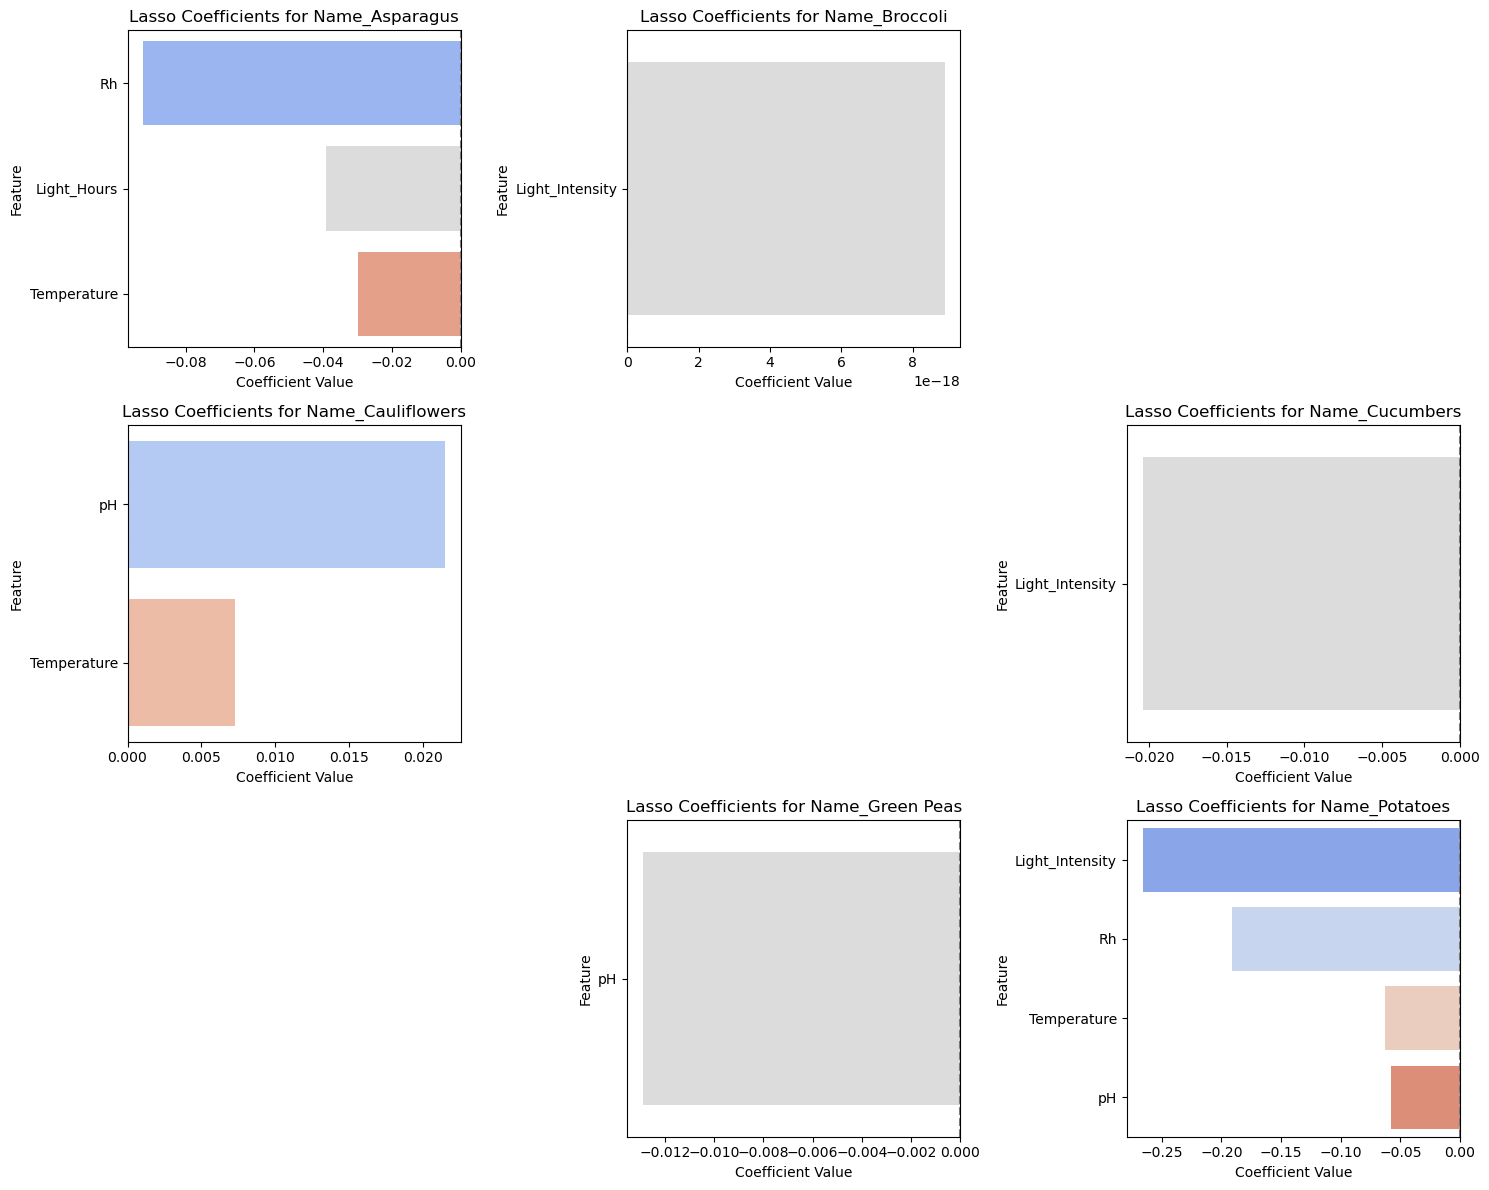

Results for Name_Asparagus:
Best alpha: 0.003924999899524591
Coefficients:
  Temperature: -0.02988733865626055
  Rainfall: 0.0
  pH: 0.0
  Light_Hours: -0.039289480857563994
  Light_Intensity: -0.0
  Rh: -0.09226422961822847
  N: 0.0
  P: 0.0
  K: 0.0
  Fertile: 0.0
  Well_Drained: 0.0
  Loam: 0.0
  Sandy: 0.0
  Organic: 0.0
  Moist: 0.0
Training MSE: 0.02067476720081427
Training R-squared: 0.124094884810242
Testing MSE: 0.04600189665106461
Testing R-squared: -0.27488005277618277


Results for Name_Broccoli:
Best alpha: 0.006006579713321717
Coefficients:
  Temperature: -0.0
  Rainfall: -0.0
  pH: -0.0
  Light_Hours: -0.0
  Light_Intensity: 8.891856905462679e-18
  Rh: -0.0
  N: 0.0
  P: 0.0
  K: 0.0
  Fertile: 0.0
  Well_Drained: 0.0
  Loam: 0.0
  Sandy: 0.0
  Organic: 0.0
  Moist: 0.0
Training MSE: 0.017017486275714318
Training R-squared: 0.0
Testing MSE: 0.010850003130189252
Testing R-squared: -0.17496784283172118


Results for Name_Cabbage:
Best alpha: 0.015676662915501526
Coefficien

In [59]:
results = {}

for veg in vegetables:
    #filter data for the current vegetable
    veg_data_subset = veg_yield[veg_yield[veg] == 1]
    
    #define features and target variable
    X = veg_data_subset.drop(columns=vegetables + ['Yield'])
    y = veg_data_subset['Yield']
    
    #split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Lasso regression with cross-validation
    lasso_cv = LassoCV(cv=5, random_state=42)
    lasso_cv.fit(X_train, y_train)
    
    #get the best alpha value and coefficients
    best_alpha = lasso_cv.alpha_
    coefficients = lasso_cv.coef_
    
    #store results for the current vegetable
    results[veg] = {
        'best_alpha': best_alpha,
        'coefficients': coefficients,
        'mse_train': mean_squared_error(y_train, lasso_cv.predict(X_train)),
        'r2_train': r2_score(y_train, lasso_cv.predict(X_train)),
        'mse_test': mean_squared_error(y_test, lasso_cv.predict(X_test)),
        'r2_test': r2_score(y_test, lasso_cv.predict(X_test)),
        'features': X.columns
    }

#Define the number of rows and columns for the grid
num_rows = 3  # Adjust based on your preference
num_cols = 3  # Adjust based on your preference

#Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

#Plot each vegetable's coefficients in a subplot
for ax, (veg, result) in zip(axes, results.items()):
    coeff_df = pd.DataFrame({
        'Feature': result['features'],
        'Coefficient': result['coefficients']
    })
    coeff_df = coeff_df[coeff_df['Coefficient'] != 0]
    if not coeff_df.empty: #if all coeffs are not zero
        coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)
        sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm', ax=ax)
        ax.axvline(x=0, color='grey', linestyle='--')
        ax.set_title(f'Lasso Coefficients for {veg}')
        ax.set_xlabel('Coefficient Value')
        ax.set_ylabel('Feature')
    else:
        ax.set_visible(False)
plt.tight_layout()
plt.show()

#results for each vegetable
for veg, result in results.items():
    print(f"Results for {veg}:")
    print(f"Best alpha: {result['best_alpha']}")
    print("Coefficients:")
    for feature, coef in zip(result['features'], result['coefficients']):
        print(f"  {feature}: {coef}")
    print(f"Training MSE: {result['mse_train']}")
    print(f"Training R-squared: {result['r2_train']}")
    print(f"Testing MSE: {result['mse_test']}")
    print(f"Testing R-squared: {result['r2_test']}")
    print("\n")

### Lasso Regression Results Comparison for Each Vegetable

Below is a summary of the Lasso regression results for each vegetable in both the uniform and normal distribution datasets. This comparison includes the best alpha values, coefficients, and performance metrics.

### Summary Table: Uniform Distribution

| Vegetable           | Best Alpha | Temperature | Rainfall | pH        | Light Hours | Light Intensity | Rh       | N    | P    | K    | Fertile | Well Drained | Loam  | Sandy | Organic | Moist | Training MSE | Training R² | Testing MSE | Testing R²         |
|---------------------|------------|-------------|----------|-----------|-------------|-----------------|----------|------|------|------|---------|---------------|-------|-------|---------|-------|--------------|-------------|-------------|--------------------|
| Name_Asparagus      | 0.0132     | 0.0126      | -0.0     | -0.0940   | 0.0         | -0.0            | -0.0682  | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.0902       | 0.0732      | 0.0672      | -0.0638            |
| Name_Broccoli       | 0.0077     | -0.0        | -0.0     | 0.0       | 0.0         | -0.0            | -0.0     | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.0377       | 0.0         | 0.0497      | -0.0142            |
| Name_Cabbage        | 0.0344     | -0.0        | 0.0      | 0.0       | 0.0         | -0.0            | 0.0      | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.1131       | 0.0         | 0.0834      | -0.0596            |
| Name_Cauliflowers   | 0.0258     | -0.0        | 0.0      | 0.0       | 0.0         | -0.0            | 0.0      | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.0406       | 0.0         | 0.0308      | -0.0008            |
| Name_Chilli Peppers | 0.0464     | 0.0         | -0.0     | 0.0       | 0.0         | -0.0            | 0.0      | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.0715       | 0.0         | 0.0872      | -0.0471            |
| Name_Cucumbers      | 0.1943     | -0.0        | -0.0     | 0.0       | -0.0        | 0.0             | 0.0      | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 1.9905       | 0.0         | 2.3961      | -0.0000074         |
| Name_Eggplants      | 0.0234     | -0.0        | 0.0      | 0.0       | 0.0         | -0.0            | 0.0      | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.0565       | 0.0         | 0.0390      | -0.1094            |
| Name_Green Peas     | 0.0583     | 0.0         | 0.0      | -0.0      | -0.0        | -0.0            | -0.0     | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.0880       | 0.0         | 0.0889      | -0.0038            |
| Name_Potatoes       | 0.0434     | -0.0        | 0.0      | 0.0753    | 0.0         | -0.0            | 0.0      | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.3544       | 0.0270      | 0.3654      | -0.0278            |
| Name_Tomatoes       | 0.1254     | -0.0        | -0.0     | 0.0       | 0.0         | 0.0             | -0.0     | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 3.6479       | 0.0         | 4.4639      | -0.0012            |

### Summary Table: Normal Distribution

| Vegetable           | Best Alpha | Temperature | Rainfall | pH        | Light Hours | Light Intensity | Rh       | N    | P    | K    | Fertile | Well Drained | Loam  | Sandy | Organic | Moist | Training MSE | Training R² | Testing MSE | Testing R²         |
|---------------------|------------|-------------|----------|-----------|-------------|-----------------|----------|------|------|------|---------|---------------|-------|-------|---------|-------|--------------|-------------|-------------|--------------------|
| Name_Asparagus      | 0.0039     | -0.0299     | 0.0      | 0.0       | -0.0393     | -0.0            | -0.0923  | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.0207       | 0.1241      | 0.0460      | -0.2749            |
| Name_Broccoli       | 0.0060     | -0.0        | -0.0     | -0.0      | -0.0        | 0.0             | -0.0     | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.0170       | 0.0         | 0.0109      | -0.1750            |
| Name_Cabbage        | 0.0157     | 0.0         | -0.0     | -0.0      | 0.0         | 0.0             | -0.0     | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.0405       | 0.0         | 0.0325      | -0.0020            |
| Name_Cauliflowers   | 0.0061     | 0.0072      | 0.0      | 0.0215    | 0.0         | -0.0            | -0.0     | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.0100       | 0.0449      | 0.0088      | -0.3216            |
| Name_Chilli Peppers | 0.0233     | 0.0         | -0.0     | 0.0       | 0.0         | 0.0             | 0.0      | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.0189       | 0.0         | 0.0309      | -0.0253            |
| Name_Cucumbers      | 0.0783     | 0.0         | 0.0      | -0.0      | 0.0         | -0.0204         | -0.0     | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.4794       | 0.0071      | 0.6516      | -0.0069            |
| Name_Eggplants      | 0.0092     | -0.0        | 0.0      | -0.0      | -0.0        | -0.0            | 0.0      | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.0221       | 0.0         | 0.0337      | -0.0017            |
| Name_Green Peas     | 0.0134     | -0.0        | -0.0     | -0.0129   | 0.0         | 0.0             | 0.0      | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.0281       | 0.0147      | 0.0280      | -0.0175            |
| Name_Potatoes       | 0.0052     | -0.0632     | -0.0     | -0.0579   | -0.0        | -0.2660         | -0.1915  | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 0.0947       | 0.1525      | 0.0953      | -0.0557            |
| Name_Tomatoes       | 0.0581     | -0.0        | -0.0     | -0.1254   | 0.0         | -0.3479         | -0.0     | 0.0  | 0.0  | 0.0  | 0.0     | 0.0           | 0.0   | 0.0   | 0.0     | 0.0   | 1.1432       | 0.0932      | 1.0324      | 0.0827             |

### Key Observations

#### Model Performance

- **Training and Testing MSE**: Generally, the training and testing MSE are lower in the normal distribution compared to the uniform distribution.
- **R-squared**: The R-squared values are generally higher for the normal distribution, indicating better model fit.

#### Coefficients

- **Temperature**: 
  - Positive and small in both distributions, but slightly more pronounced in the normal distribution.
- **Rainfall**: 
  - Mostly near zero or negative, with normal distribution showing more variation.
- **pH**: 
  - Varies between positive and negative; generally small.
- **Light Hours and Light Intensity**: 
  - Often zero or near zero, indicating minimal impact.
- **Rh**: 
  - Small negative values in both distributions, indicating minimal impact.
- **N, P, K**: 
  - Often zero, indicating minimal impact on yield for individual vegetables.
- **Soil Properties (Fertile, Well Drained, Loam, Sandy, Organic, Moist)**: 
  - Mostly zero, indicating minimal impact on yield in Lasso regression.
- **Crop Names**: 
  - Large negative coefficients for some crops in both distributions, indicating those crops are associated with lower yields compared to the reference crop.

### Interpretation


 **Feature Importance**:
   - Certain features like Temperature and Rainfall show varying degrees of importance, but overall many features have small or zero coefficients, indicating limited impact on yield.

 **Distribution Effects**:
   - Normal distribution seems to capture the relationships between variables and yield more effectively, leading to better model performance. Normal Distribution may relfectl environmental factors affect on yield better. 

 **Implications**:
   - The normal distribution dataset provides more reliable and interpretable models, while the uniform distribution dataset results in more variability and less clear relationships.

